# 6.804 Computational Cognitive Science
## Unsupervised Learning

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from ipywidgets import interact
import itertools as it

import sys
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 3)

## Animal Attributes

<img src="Animals_with_Attributes2/predicate-matrix.png" width=500>

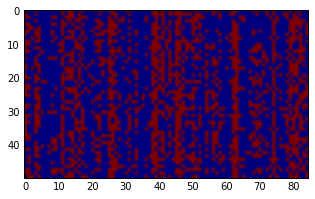

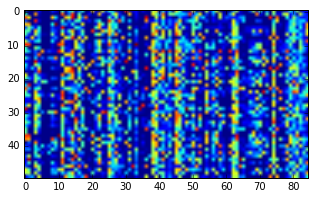

In [2]:
f1 = open ( './Animals_with_Attributes2/predicate-matrix-binary.txt' , 'r')
animals_binary = np.array([list(map(int,line[:-1].split(' '))) for line in f1])
plt.imshow(animals_binary)

f2 = open ( './Animals_with_Attributes2/predicate-matrix-continuous.txt' , 'r')
animals_cts = np.array([list(map(float, filter(lambda x:len(x)>0,[x for x in line[:-1].split(' ')])))  for line in f2])
plt.figure()
plt.imshow(animals_cts)

f3 =  open ( './Animals_with_Attributes2/classes.txt' , 'r')
animal_names = [''.join(filter(lambda x:str.isalpha(x) or x=='+',line)) for line in f3]
#print(animal_names)

f4 =  open ( './Animals_with_Attributes2/predicates.txt' , 'r')
attributes = [''.join(filter(str.isalpha,line)) for line in f4]
#print(attributes)

Demonstrate k-means clustering

In [3]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams['figure.figsize'] = (16, 9)

# Creating a sample dataset with 4 clusters
X, y = make_blobs(n_samples=800, n_features=3, centers=4)
#points are rows of X
#y is a list of cluster numbers

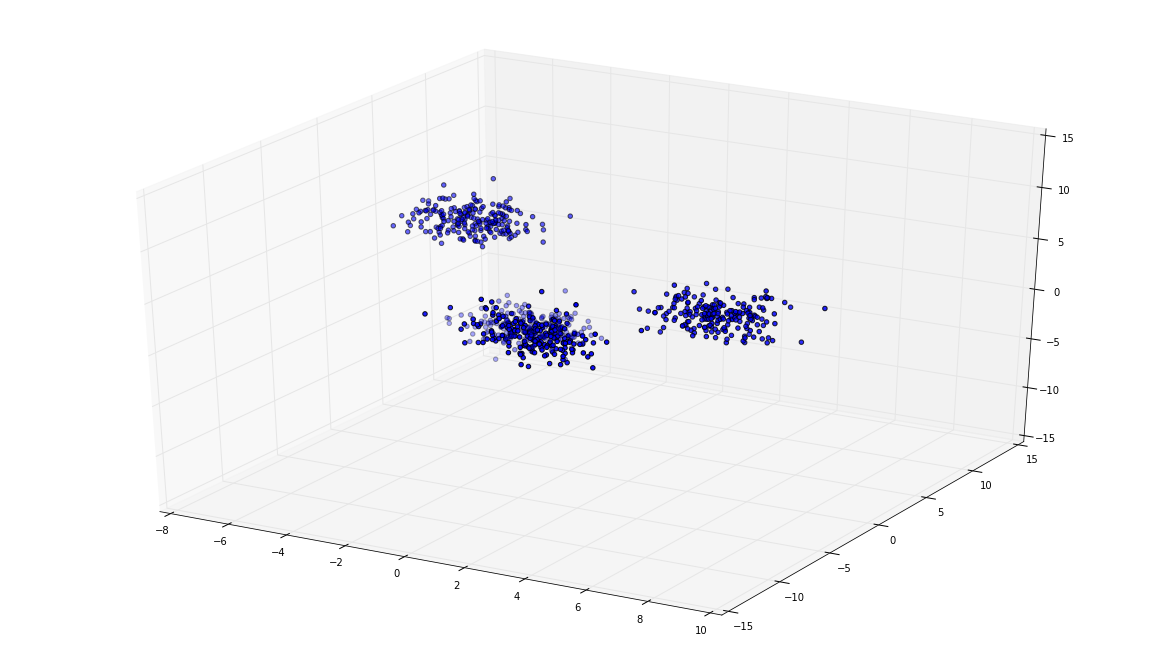

In [4]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2])

In [5]:
# Initializing KMeans
kmeans = KMeans(n_clusters=4)
# Fitting with inputs
kmeans_fit = kmeans.fit(X)
# Predicting the clusters
labels = kmeans_fit.predict(X)
# Getting the cluster centers
C = kmeans_fit.cluster_centers_

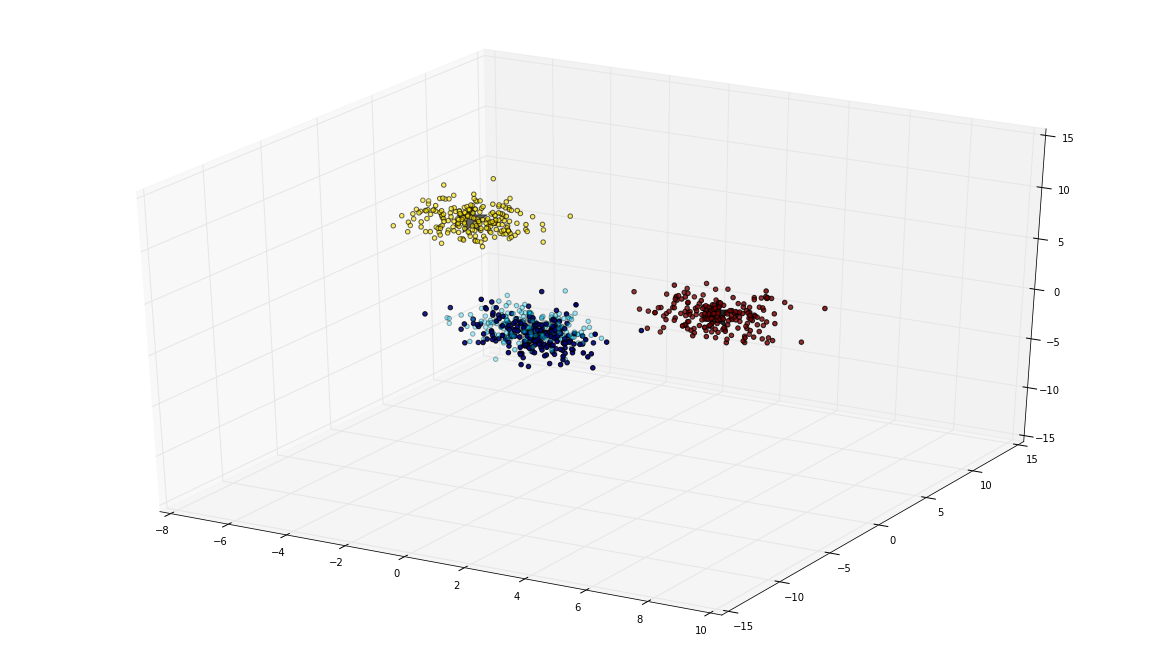

In [6]:
fig = plt.figure()
ax = Axes3D(fig)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=labels) #color supplied from grouping from start
ax.scatter(C[:, 0], C[:, 1], C[:, 2], marker='*', c='#050505', s=1000)
#points are rows for all of the above
#only thing this collected from the fit is are the centers
#print(kmeans_fit.labels_)

<Container object of 18 artists>

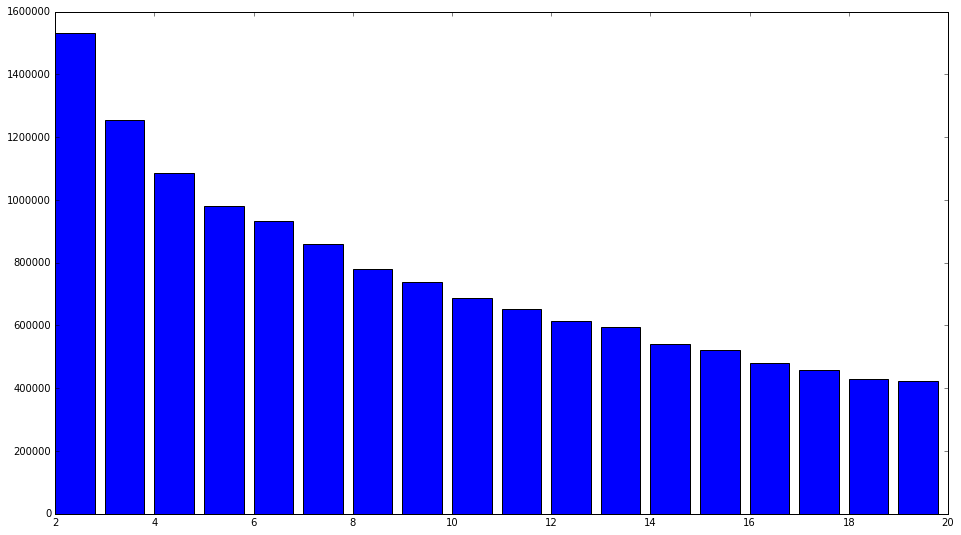

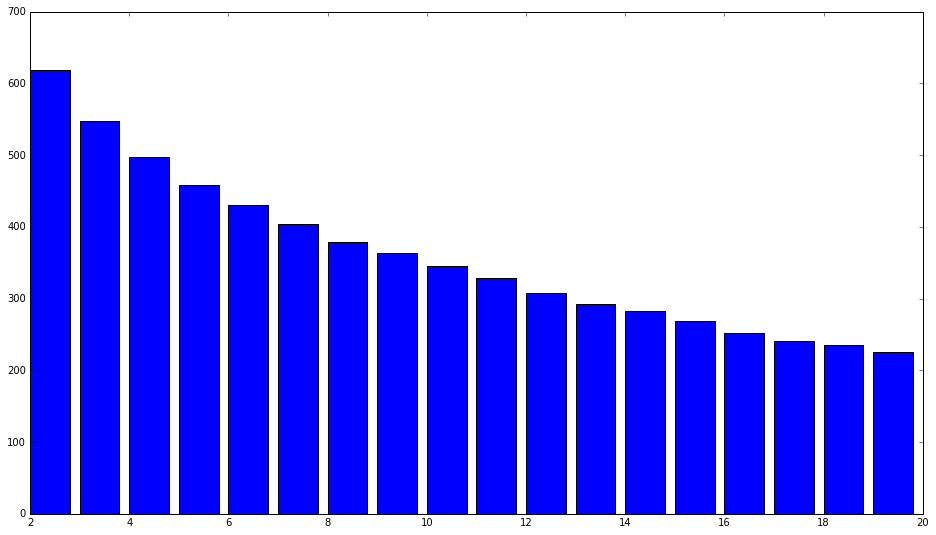

In [7]:
def calc_fit_error(data,num_clusters):
    # Initializing KMeans
    kmeans = KMeans(n_clusters=num_clusters)
    # Fitting with inputs
    kmeans_fit = kmeans.fit(data)
    # Predicting the clusters
    labels = kmeans_fit.predict(data)
    # Getting the cluster centers
    # labels = animal_kmeans_fit.cluster_centers_
    return kmeans_fit.inertia_

plt.figure()
test_range = range(2,20)
plt.bar(test_range,[calc_fit_error(animals_cts,k) \
                    for k in test_range])

plt.figure()
test_range = range(2,20)
plt.bar(test_range,[calc_fit_error(animals_binary,k) \
                    for k in test_range])

#About 6 seems reasonable in either
    


In [8]:

# Initializing KMeans
kmeans = KMeans(n_clusters=6)
# Fitting with inputs
kmeans_fit = kmeans.fit(animals_cts)
# Predicting the clusters
labels = kmeans_fit.predict(animals_cts)
# Getting the cluster centers
# labels = animal_kmeans_fit.cluster_centers_
    
#print(animal_names)
unique_labels = list(set(labels))
#print(it.groupby(animal_names, key=))
grouped_indices = [[i for i,x in enumerate(labels) if x==group] \
                   for group in unique_labels]
grouped_animal_names = [[animal_names[i] for i in group] \
                           for group in grouped_indices]
print(grouped_animal_names)
#would like to regroup matrix by clusters
#then keep labels on y axis


[['hippopotamus', 'elephant', 'rhinoceros'], ['beaver', 'dalmatian', 'persian+cat', 'siamese+cat', 'skunk', 'mole', 'hamster', 'squirrel', 'rabbit', 'bat', 'chihuahua', 'rat', 'weasel', 'mouse', 'collie', 'raccoon'], ['grizzly+bear', 'german+shepherd', 'tiger', 'leopard', 'fox', 'wolf', 'bobcat', 'lion', 'polar+bear'], ['spider+monkey', 'gorilla', 'chimpanzee'], ['killer+whale', 'blue+whale', 'humpback+whale', 'seal', 'otter', 'walrus', 'dolphin'], ['antelope', 'horse', 'moose', 'ox', 'sheep', 'giraffe', 'buffalo', 'zebra', 'giant+panda', 'deer', 'pig', 'cow']]


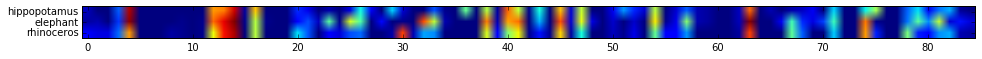

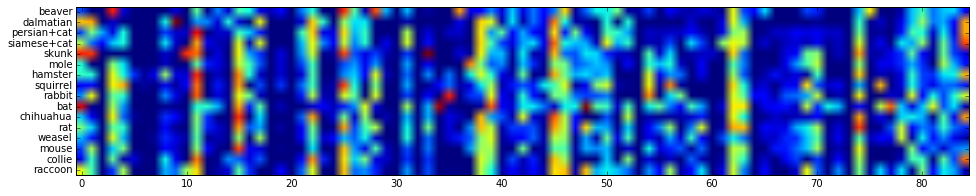

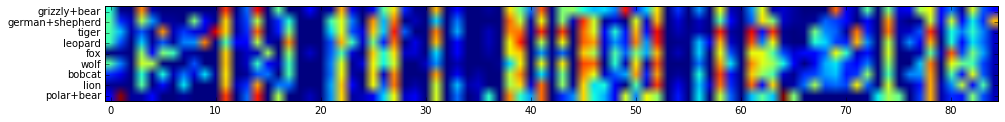

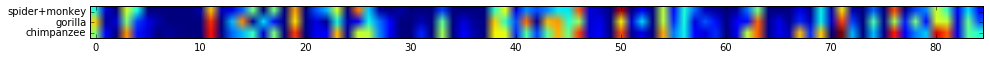

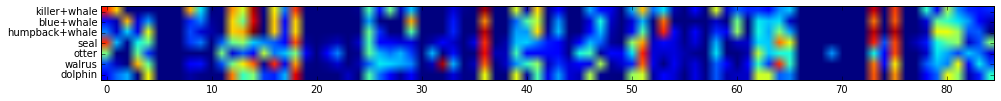

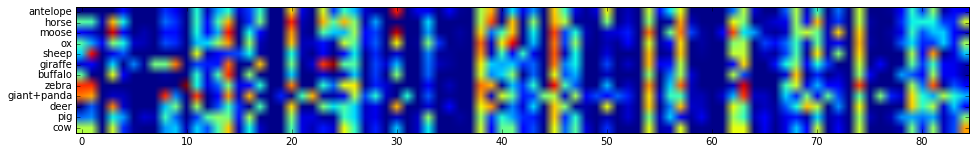

In [9]:
#import functools as ft

#flatten = lambda lst: ft.reduce(lambda x,y: x+y, lst)

#Now show matrix with labels
#plt.figure(figsize=(20,10))
#plt.yticks(range(len(animal_names)),animal_names)
#plt.imshow(animals_cts)

#print(animals_cts[0])
#Now do with groupings
grouped_animal_arrays = [np.array([animals_cts[i] for i in group]) for group in grouped_indices]

for k in range(len(grouped_animal_names)):
    plt.figure()#figsize=(20,10)
    plt.yticks(range(len(animal_names)),grouped_animal_names[k])
    plt.imshow(grouped_animal_arrays[k])

In [10]:
@interact(num_clusters=(2, 10, 1))
def plot_grouped_animals(num_clusters=6, reorder_by_homogeneity=False):
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans_fit = kmeans.fit(animals_cts)
    labels = kmeans_fit.predict(animals_cts)
    unique_labels = list(set(labels))
    grouped_indices = [[i for i,x in enumerate(labels) if x==group] \
                       for group in unique_labels]
    grouped_animal_names = [[animal_names[i] for i in group] \
                            for group in grouped_indices]
    grouped_animal_arrays = [np.array([animals_cts[i] for i in group]) for group in grouped_indices]

    for k in range(len(grouped_animal_names)):
        plt.figure()#figsize=(20,10)
        plt.yticks(range(len(animal_names)),grouped_animal_names[k])
        current_array = grouped_animal_arrays[k]
        if reorder_by_homogeneity:
            average_y = np.mean(current_array,axis=0)
            total_deviation = np.sum(abs(current_array-average_y),axis=0)
            most_homogeneous_indices = sorted(range(len(total_deviation)),\
                                               key=lambda i: total_deviation[i])
            reordered_current_array = np.hstack([current_array[:,i].reshape(-1,1) \
                                                 for i in most_homogeneous_indices])
            plt.xticks(range(4),[attributes[i] for i in most_homogeneous_indices[:4]],rotation='vertical')
            plt.imshow(reordered_current_array)
        else:
            plt.imshow(current_array)
        
    #would like to identify the most important features
    #how to tell if a feature is important? -- PCA
    #clustering does pretty well right off the bat

interactive(children=(IntSlider(value=6, description='num_clusters', max=10, min=2), Checkbox(value=False, description='reorder_by_homogeneity'), Output()), _dom_classes=('widget-interact',))

Steps of algo:
 1. Standardize data
 2. Obtain the eigenvecs and eigenvals from the covariance or correlation matrix or perform SVD
 3. Sort eigenvals in descending order and choose the k eigenvecs that
  corresond to the k largeset eigenvals (choose some k <=d)
 4. Construct the projection matrix W from the selected k eigenvecs
 5. Transform the original dataset X via W to obtain a k-dim feature subspace Y


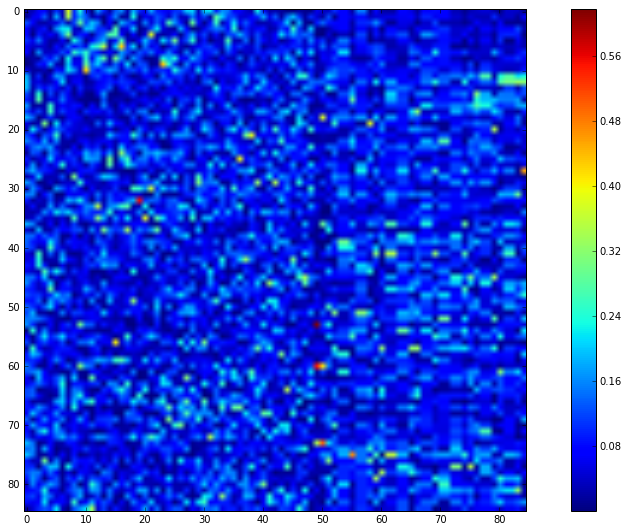

In [11]:
from sklearn.preprocessing import StandardScaler

#1. Standardize data
X_std = StandardScaler().fit_transform(animals_cts)

#2. Eigenstuff
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)

plt.imshow(abs(eig_vecs))
plt.colorbar()


Eigenvalues in descending order:


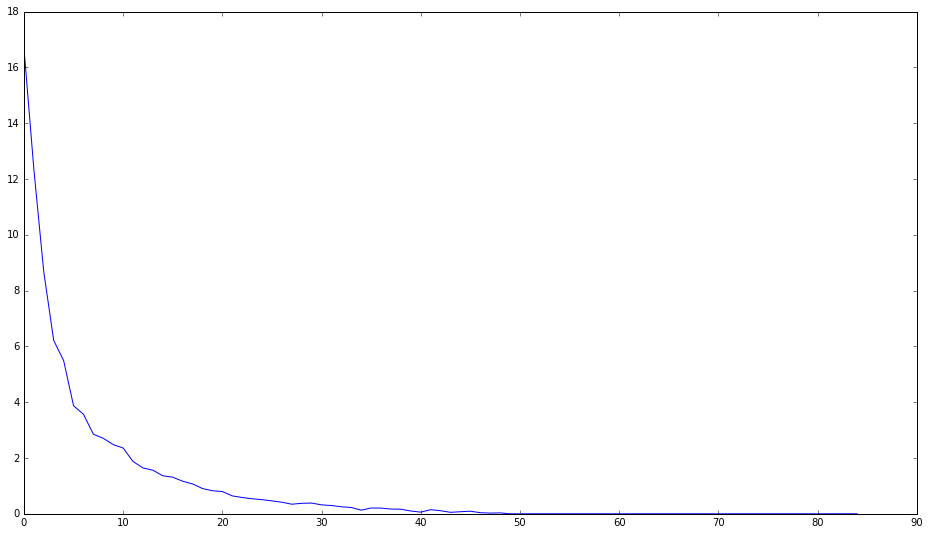

In [12]:
# 3. Choose k eigenvecs w/ largest eigenvals

# Make a list of (eigenvalue, eigenvector) tuples
eig_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]

# Sort the (eigenvalue, eigenvector) tuples from high to low
sorted(eig_pairs, key=lambda p: p[0]).reverse()

# Visually confirm that the list is correctly sorted by decreasing eigenvalues
print('Eigenvalues in descending order:')
plt.plot([p[0] for p in eig_pairs])

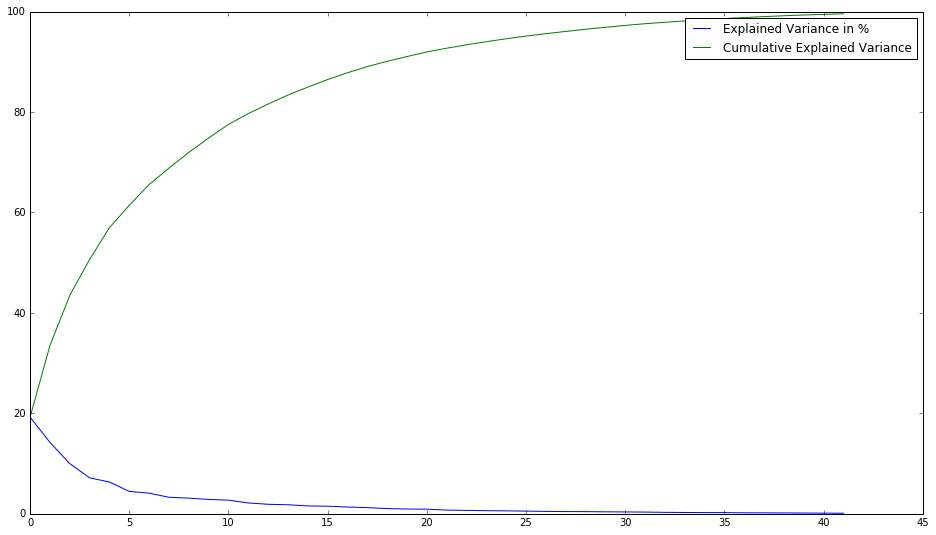

In [13]:
#4. Construct the projection matrix W from the selected k eigenvecs
#How many principal components are we going to choose for our new feature subspace?
#Pick ones with largest variance
eigenvals = eig_vals.copy()
tot = sum(eigenvals)
var_exp = [(i / tot)*100 for i in sorted(eigenvals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)

num_to_show = int(len(eigenvals)/2)
plt.figure()
plt.plot(range(num_to_show), list(map(abs,var_exp[:num_to_show])), \
             label='Explained Variance in %')
plt.plot(range(num_to_show), list(map(abs,cum_var_exp[:num_to_show])), \
             label='Cumulative Explained Variance')
plt.legend(['Explained Variance in %','Cumulative Explained Variance'])

#This problem is not very easily reducible

In [14]:
def find_peaks(x, thresh = 0.2) :
    ''' finds peaks in 1D vector.
    Inputs:
        x: input vector
        thresh: relative threshold value. Discard peak whose value is lower than (thresh * max_peak_value).
    Output:
        np.array of index values of peaks
    '''

    x0 = x[:-2]   # x
    x1 = x[1:-1]  # x shifted by 1
    x2 = x[2:]    # x shifted by 2

    peak_bools = np.logical_and(x0 < x1, x1 > x2) # where x1 is higher than surroundings
    values = x1[peak_bools]                       # list of all peak values

    # find a threshold relative to the highest peak
    th = np.max(values) * thresh
    
    # filter out values that are below th
    peak_bools = np.logical_and(peak_bools, x1 > th)

    peaks = np.nonzero( peak_bools )[0] + 1       # get indexes of peaks, shift by 1
    return peaks



In [16]:
@interact(target_dim=(2, 10, 1))
def plot_PCA(target_dim=3):
    matrix_w = np.hstack([p[1].reshape(-1,1) for p in eig_pairs[:target_dim]]) 
    projected_animal_cts = X_std.dot(matrix_w)
    
    plt.figure(figsize=(20,10))
    plt.yticks(range(len(animal_names)),animal_names)        
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='off',      # ticks along the bottom edge are off
        top='off',         # ticks along the top edge are off
        labelbottom='off') # labels along the bottom edge are off
    plt.imshow(abs(projected_animal_cts))
    
    for i in range(target_dim):
        abs_eigenvec = np.array(abs(eig_pairs[i][1]))
        plt.figure(figsize=(8,2))
        plt.plot(abs_eigenvec)
        peak_indices = find_peaks(abs_eigenvec, thresh = 0.9)
        plt.plot(peak_indices, abs_eigenvec[peak_indices], 'ro')
        plt.xticks(peak_indices,np.array(attributes)[peak_indices],rotation='vertical')

#The x axis no longer corresponds directly to features, 
#but rather combinations of them in the form of the eigenvector

#can label most important eigenvectors with their important features


interactive(children=(IntSlider(value=3, description='target_dim', max=10, min=2), Output()), _dom_classes=('widget-interact',))

In [17]:
@interact(pca_dim=(2,10,1))
def plot_grouped_animals(pca_dim=3):
    num_clusters=6
    matrix_w = np.hstack([abs(p[1].reshape(-1,1)) for p in eig_pairs[:target_dim]]) 
    projected_animal_cts = X_std.dot(matrix_w)
    
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans_fit = kmeans.fit(projected_animal_cts)
    labels = kmeans_fit.predict(projected_animal_cts)
    unique_labels = list(set(labels))
    grouped_indices = [[i for i,x in enumerate(labels) if x==group] \
                       for group in unique_labels]
    grouped_animal_names = [[animal_names[i] for i in group] \
                            for group in grouped_indices]
    grouped_animal_arrays = [np.array([projected_animal_cts[i] for i in group]) for group in grouped_indices]

    for k in range(len(grouped_animal_names)):
        plt.figure()#figsize=(20,10)
        plt.yticks(range(len(animal_names)),grouped_animal_names[k])
        current_array = grouped_animal_arrays[k]
        plt.imshow(current_array, interpolation='none')
    
#Getting difficult to interpret
#Check out difference between groupings
 #pca_dim 7 doing pretty well, though the chihuahua group is strange
 #These are not nearly as good as clustering though
  #the chihuahua group is a good indicator of that
#This is representative of the irreducibility of the animal problem

#Maybe MDS can do better

interactive(children=(IntSlider(value=3, description='pca_dim', max=10, min=2), Output()), _dom_classes=('widget-interact',))

In [322]:
from sklearn.metrics import pairwise_distances

#It is possible that this dataset isn't so sensitive to rotations
#Maybe it is more sensitive two distance between pairs of points
D = pairwise_distances(animals_cts)
D.shape


(50, 50)

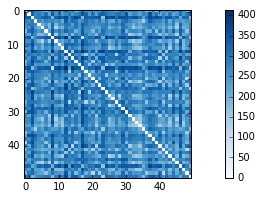

In [323]:
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

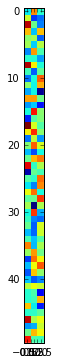

In [338]:
from sklearn.manifold import MDS

model = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(D)
plt.figure(figsize=(3,6))
plt.imshow(out,interpolation='none')


In [339]:
@interact(num_mds_components=(2,10,1))
def plot_grouped_animals(num_mds_components=3):
    num_clusters=6
    #matrix_w = np.hstack([abs(p[1].reshape(-1,1)) for p in eig_pairs[:target_dim]]) 
    #projected_animal_cts = X_std.dot(matrix_w)
    model = MDS(n_components=3, dissimilarity='precomputed', random_state=1)
    embedded_animal_cts = model.fit_transform(D)
    
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans_fit = kmeans.fit(embedded_animal_cts)
    labels = kmeans_fit.predict(embedded_animal_cts)
    unique_labels = list(set(labels))
    grouped_indices = [[i for i,x in enumerate(labels) if x==group] \
                       for group in unique_labels]
    grouped_animal_names = [[animal_names[i] for i in group] \
                            for group in grouped_indices]
    grouped_animal_arrays = [np.array([embedded_animal_cts[i] for i in group]) for group in grouped_indices]

    for k in range(len(grouped_animal_names)):
        plt.figure()#figsize=(20,10)
        plt.yticks(range(len(animal_names)),grouped_animal_names[k])
        current_array = grouped_animal_arrays[k]
        plt.imshow(current_array, interpolation='none')
        
#Even at 3 components, doing much better than pca
# still strange we have monkeys with antelope, deer zebra
# not getting out of this at higher num mds components

interactive(children=(IntSlider(value=3, description='num_mds_components', max=10, min=2), Output()), _dom_classes=('widget-interact',))

It's fun to make changes to $X(k)$ before reconstruction:

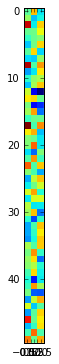

In [342]:
from sklearn.manifold import LocallyLinearEmbedding

model = LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='modified',
                               eigen_solver='dense')
out = model.fit_transform(D)
plt.figure(figsize=(3,6))
plt.imshow(out,interpolation='none')

In [343]:
@interact(num_mds_components=(2,10,1))
def plot_grouped_animals(num_mds_components=3):
    num_clusters=6
    model = LocallyLinearEmbedding(n_neighbors=30, n_components=3, method='modified',
                               eigen_solver='dense')
    embedded_animal_cts = model.fit_transform(D)
    
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans_fit = kmeans.fit(embedded_animal_cts)
    labels = kmeans_fit.predict(embedded_animal_cts)
    unique_labels = list(set(labels))
    grouped_indices = [[i for i,x in enumerate(labels) if x==group] \
                       for group in unique_labels]
    grouped_animal_names = [[animal_names[i] for i in group] \
                            for group in grouped_indices]
    grouped_animal_arrays = [np.array([embedded_animal_cts[i] for i in group]) for group in grouped_indices]

    for k in range(len(grouped_animal_names)):
        plt.figure()#figsize=(20,10)
        plt.yticks(range(len(animal_names)),grouped_animal_names[k])
        current_array = grouped_animal_arrays[k]
        plt.imshow(current_array, interpolation='none')
        
#hugely better -- find out why so can write up -- at 3
#when high, like 8, starts going against intuition again


interactive(children=(IntSlider(value=3, description='num_mds_components', max=10, min=2), Output()), _dom_classes=('widget-interact',))

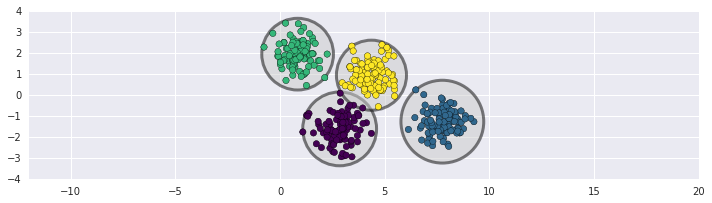

In [345]:
#Lastly Try GMM to compare with the k-means clustering
#k-means simple and easy to understand
# non-prob nature of k-means and its use of simple dist from cluster-center to 
 #leads to poor performance for many rea--world situations
#can be viewed as extension of ideas behind k-means
import seaborn as sns; sns.set()
from scipy.spatial.distance import cdist
#weaknesses of k-means
# might expent that more certain for points nearer to the center
# however, has no notion of probability in assignment
#k-means creates hard-cutoffs, as illustrated below
X, y_true = make_blobs(n_samples=400, centers=4,
                       cluster_std=0.60, random_state=0)
X = X[:, ::-1] # flip axes for better plotting
kmeans = KMeans(4, random_state=0)
labels = kmeans.fit(X).predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');

def plot_kmeans(kmeans, X, n_clusters=4, rseed=0, ax=None):
    labels = kmeans.fit_predict(X)

    # plot the input data
    ax = ax or plt.gca()
    ax.axis('equal')
    ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)

    # plot the representation of the KMeans model
    centers = kmeans.cluster_centers_
    radii = [cdist(X[labels == i], [center]).max()
             for i, center in enumerate(centers)]
    for c, r in zip(centers, radii):
        ax.add_patch(plt.Circle(c, r, fc='#CCCCCC', lw=3, alpha=0.5, zorder=1))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X)

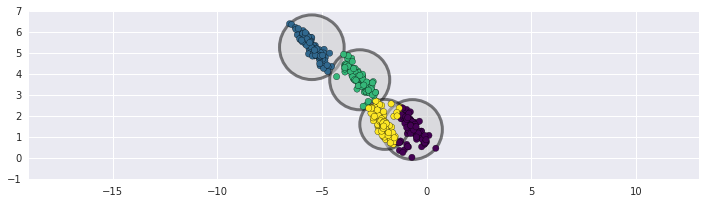

In [346]:
#but the next example is non-circular, by k-means is not flexible enough to account for this
#tries to force-fit the data into 4 circular clusters
#can help this potentially w/ PCA, but no guarantee that such a global operation will circularize the data
rng = np.random.RandomState(13)
X_stretched = np.dot(X, rng.randn(2, 2))

kmeans = KMeans(n_clusters=4, random_state=0)
plot_kmeans(kmeans, X_stretched)
#K-means
# lack of flex in cluster shape and lack of probabilistic cluster assignment
# looks like the data is high dim enough that it does pretty well anyway
#Want to measure uncertainty in cluster assignment by comparing the dists of each point to al cluster centers, 
# rather than focusing on just the closest
#maybe also allow for non-circular clusters
#turns out these are 2 essential components of Guassian mixture models

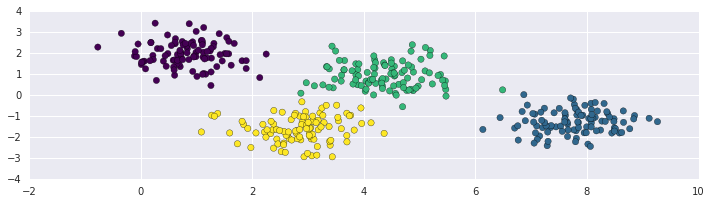

In [352]:
from sklearn.mixture import GMM
gmm = GaussianMixture(n_components=4).fit(X)
labels = gmm.predict(X)
plt.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis');


In [353]:
from matplotlib.patches import Ellipse

def draw_ellipse(position, covariance, ax=None, **kwargs):
    """Draw an ellipse with a given position and covariance"""
    ax = ax or plt.gca()
    
    # Convert covariance to principal axes
    if covariance.shape == (2, 2):
        U, s, Vt = np.linalg.svd(covariance)
        angle = np.degrees(np.arctan2(U[1, 0], U[0, 0]))
        width, height = 2 * np.sqrt(s)
    else:
        angle = 0
        width, height = 2 * np.sqrt(covariance)
    
    # Draw the Ellipse
    for nsig in range(1, 4):
        ax.add_patch(Ellipse(position, nsig * width, nsig * height,
                             angle, **kwargs))
        
def plot_gmm(gmm, X, label=True, ax=None):
    ax = ax or plt.gca()
    labels = gmm.fit(X).predict(X)
    if label:
        ax.scatter(X[:, 0], X[:, 1], c=labels, s=40, cmap='viridis', zorder=2)
    else:
        ax.scatter(X[:, 0], X[:, 1], s=40, zorder=2)
    ax.axis('equal')
    
    w_factor = 0.2 / gmm.weights_.max()
    for pos, covar, w in zip(gmm.means_, gmm.covars_, gmm.weights_):
        draw_ellipse(pos, covar, alpha=w * w_factor)

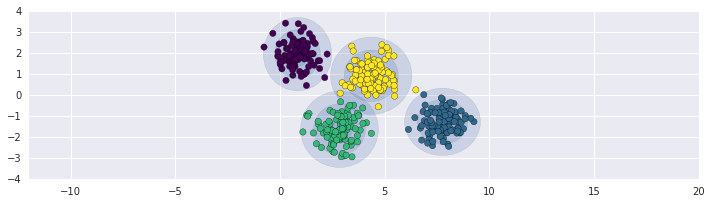

In [355]:
import warnings
warnings.filterwarnings('ignore')

gmm = GMM(n_components=4, random_state=42)
plot_gmm(gmm, X)

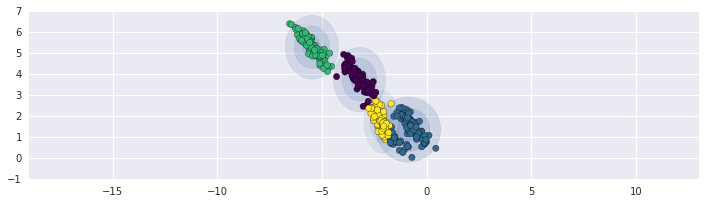

In [356]:
plot_gmm(gmm, X_stretched)

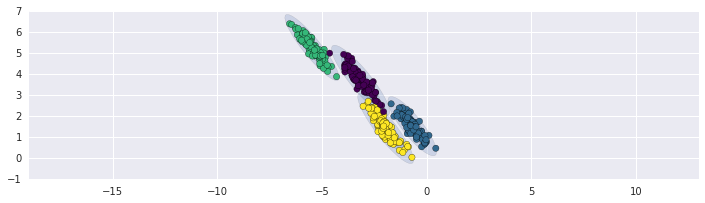

In [357]:
gmm = GMM(n_components=4, covariance_type='full', random_state=42)
plot_gmm(gmm, X_stretched)

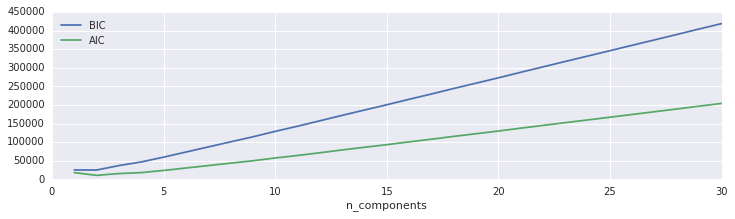

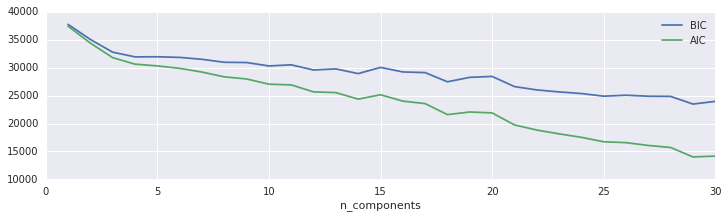

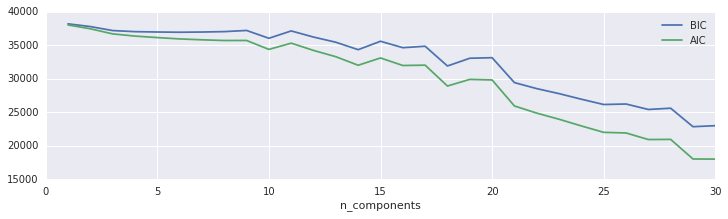

In [365]:
types = ['full','diag','spherical']
for t in types:
    plt.figure()
    n_components = np.arange(1, 31)
    models = [GMM(n, covariance_type=t, random_state=0).fit(animals_cts)
               for n in n_components]
    plt.plot(n_components, [m.bic(animals_cts) for m in models], label='BIC')
    plt.plot(n_components, [m.aic(animals_cts) for m in models], label='AIC')
    plt.legend(loc='best')
    plt.xlabel('n_components');

#AIC=Akaike information criterion or BIC=Bayesian information criterion
#optimal num clusters is val that minizes the AIC or BIC

#test inconclusive

In [373]:
@interact(n_components=(2,10,1))
def plot_grouped_animals(n_components=6):
    model = GMM(n_components=n_components, covariance_type='full', random_state=0).fit(animals_cts)
    
    labels = model.fit(animals_cts).predict(animals_cts)
    
    unique_labels = list(set(labels))
    grouped_indices = [[i for i,x in enumerate(labels) if x==group] \
                       for group in unique_labels]
    grouped_animal_names = [[animal_names[i] for i in group] \
                            for group in grouped_indices]
    grouped_animal_arrays = [np.array([animals_cts[i] for i in group]) for group in grouped_indices]

    for k in range(len(grouped_animal_names)):
        plt.figure()#figsize=(20,10)
        plt.yticks(range(len(animal_names)),grouped_animal_names[k])
        current_array = grouped_animal_arrays[k]
        plt.imshow(current_array)
        
#6 components -- pretty reasonable
#May just be redundant to put through PCA after that:w

        

interactive(children=(IntSlider(value=6, description='n_components', max=10, min=2), Output()), _dom_classes=('widget-interact',))